<a href="https://colab.research.google.com/github/OliverEvans96/planck-integral/blob/main/NumericalBenchmarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from mpmath import mp
from scipy import constants as const
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [3]:
mp.dps = 50

In [37]:
T_0 = 6007 # Kelvin

In [4]:
print(mp.quad(lambda x: mp.exp(-x**2), [-mp.inf, mp.inf]) ** 2)

3.1415926535897932384626433832795028841971693993751


In [5]:
def plancks_law(nu, T):
  return 2 * const.h * nu**3 / ((mp.exp(const.h * nu / (const.k * T)) - 1) * const.c**2 )

In [6]:
sp_h, sp_k, sp_c, sp_nu, sp_T = sp.var('h, k, c, nu, T')

In [7]:
def plancks_law_sym(nu, T):
  return 2 * sp_h * nu**3 / ((sp.exp(sp_h * nu / (sp_k * T)) - 1) * sp_c**2 )

In [26]:
crit_eq = sp.Eq(sp.diff(plancks_law_sym(sp_nu, sp_T), sp_nu), 0)
crit_eq

Eq(6*h*nu**2/(c**2*(exp(h*nu/(T*k)) - 1)) - 2*h**2*nu**3*exp(h*nu/(T*k))/(T*c**2*k*(exp(h*nu/(T*k)) - 1)**2), 0)

In [12]:
sp_x = sp.var('x')

In [28]:
crit_eq_x = crit_eq.subs(sp_h*sp_nu/(sp_T*sp_k), sp_x)
crit_eq_x

Eq(-2*h*nu**2*x*exp(x)/(c**2*(exp(x) - 1)**2) + 6*h*nu**2/(c**2*(exp(x) - 1)), 0)

In [17]:
sp.simplify(crit_eq_x)

Eq(2*h*nu**2*(-x*exp(x) + 3*exp(x) - 3)/(c**2*(1 - exp(x))**2), 0)

In [16]:
sp.solve(crit_eq_x, sp_x)

[]

In [29]:
def peak_eq(x):
  return -x * mp.exp(x) + 3 * mp.exp(x) - 3

In [32]:
x_val = mp.findroot(peak_eq, 2.8)
print(x_val)

2.8214393721220788934031913302944851953458817440731


In [36]:
peak_freq = x_val * const.k * T_0 / const.h
print(peak_freq)

353147070261844.80718870662046063248218291440882952


In [38]:
mp.quad(lambda nu: plancks_law(nu, T_0), [0, peak_freq])

mpf('8319315.4051414121801213118798474992031764044186799178')

In [40]:
nu_arr = np.linspace(1, 1e15, 10000) # Hz

In [43]:
B_arr = np.array([plancks_law(nu, T_0) for nu in nu_arr])
B_max = np.max(B_arr)

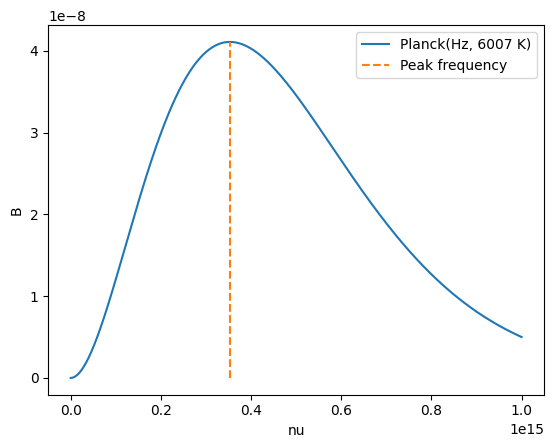

In [51]:
plt.plot(nu_arr, B_arr, label=f'Planck(Hz, {T_0} K)')
plt.xlabel('nu')
plt.ylabel('B')
plt.vlines([peak_freq], 0, B_max, color='C1', ls='--', label='Peak frequency')
plt.legend()

In [ ]:
# Test mpmath precision

In [67]:
nu_0 = 877253052027857.375 # Hz
digits_range = list(range(1, 100))
integral_vals = []
for num_digits in digits_range:
  mp.dps = num_digits
  integral = mp.quad(lambda nu: plancks_law(nu, T_0), [0, nu_0])
  integral_vals.append(integral)

final_ans = integral_vals[-1]
err_arr = []
for ans in integral_vals[:-1]:
  err = np.abs(ans - final_ans)
  err_arr.append(err)

Text(0, 0.5, 'error')

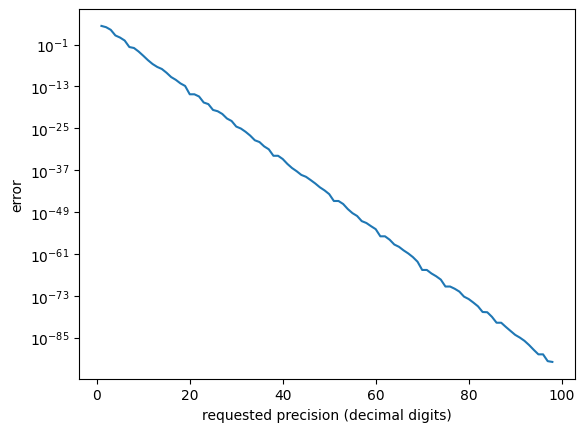

In [69]:
plt.plot(digits_range[:-1], err_arr)
plt.yscale('log')
plt.xlabel('requested precision (decimal digits)')
plt.ylabel('error')

In [59]:
len('47942761616209850217273924499750137329101563')

44

In [50]:
integral = mp.quad(lambda x: plancks_law(x, T_0), [0, nu_0])
print(integral)

21735125.479427616162099082456733700601438688200739


In [51]:
integral

mpf('21735125.479427616162099082456733700601438688200739144')